In [ ]:
# Seed environment
seed_value = 1 # seed value

# Set`PYTHONHASHSEED` environment variable at a fixed value
import os

os.environ['PYTHONHASHSEED']=str(seed_value)

# Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed = seed_value

# Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed = seed_value

# Set the `tensorflow` pseudo-random generator at a fixed value import tensorflow as tf tf.seed = seed_value

In [ ]:
DATADIR = '/content/drive/MyDrive/rop'
CATEGORIES = ['benign', 'malignant']

In [ ]:
# set configs
base_path = '/content/drive/MyDrive/rop'
target_size = (224,224,3)

# define shape for all images # get classes
classes = os.listdir(base_path)
print(classes)

['malignant', 'benign']


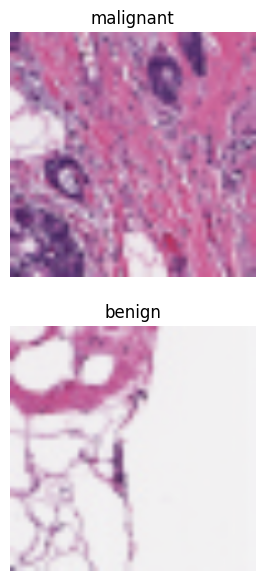

In [ ]:
# plot sample images

import matplotlib.pyplot as plt
import cv2

f, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize = (16,7))

for ax, label in zip(axes.ravel(), classes):
    img = np.random.choice(os.listdir(os.path.join(base_path, label)))
    img = cv2.imread(os.path.join(base_path, label, img))
    img = cv2.resize(img, target_size[:2])
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGRA2RGB))
    ax.set_title(label)
    ax.axis(False)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   vertical_flip = True,
                                   validation_split=0.25)

In [ ]:
train_gen = datagen.flow_from_directory(base_path,
                                               target_size=target_size[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset='training')
val_gen =  datagen.flow_from_directory(base_path,
                                               target_size=target_size[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset='validation',
                                               shuffle=False)

Found 1303 images belonging to 2 classes.
Found 434 images belonging to 2 classes.


In [ ]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Model  # Add this import statement
import tensorflow as tf
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

# Build model
input = Input(shape= target_size)


x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input)
x = MaxPool2D(2,2)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(2,2)(x)

x = Conv2D(filters=128, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(2,2)(x)

x = Conv2D(filters=256, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(2,2)(x)

x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(units=128, activation='relu')(x)
x = Dense(units=64, activation='relu')(x)

output = Dense(units=2, activation='softmax')(x)  # Adjust the number of units based on your number of classes


custom_model  = Model(input, output, name= 'Custom_Model')


In [ ]:
# compile model
custom_model.compile(loss= 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# initialize callbacks
reduceLR = ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1,                                  mode='min', factor=  0.2, min_lr = 1e-6)

early_stopping = EarlyStopping(monitor='val_loss', patience = 5 , verbose=1,                                  mode='min', restore_best_weights= True)

checkpoint = ModelCheckpoint('CustomModel.weights.hdf5', monitor='val_loss',                               verbose=1,save_best_only=True, mode= 'min')

callbacks= [reduceLR, early_stopping,checkpoint]

In [ ]:
# define training config
TRAIN_STEPS = 14 #batch_size
VAL_STEPS = 12 #batch_size
epochs = 10

# train model
custom_model.fit(train_gen,
                 steps_per_epoch= TRAIN_STEPS,
                 validation_data=val_gen,
                 validation_steps=VAL_STEPS,
                 epochs= epochs, callbacks= callbacks)

Epoch 1/10
14/14 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.6272
Epoch 1: val_loss improved from inf to 0.68846, saving model to CustomModel.weights.hdf5
14/14 [==============================] - 96s 7s/step - loss: 0.6970 - accuracy: 0.6272 - val_loss: 0.6885 - val_accuracy: 0.7031 - lr: 0.0010
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - ETA: 0s - loss: 0.6495 - accuracy: 0.6384
Epoch 2: val_loss did not improve from 0.68846
14/14 [==============================] - 87s 6s/step - loss: 0.6495 - accuracy: 0.6384 - val_loss: 2.0236 - val_accuracy: 0.7031 - lr: 0.0010
Epoch 3/10
14/14 [==============================] - ETA: 0s - loss: 0.7200 - accuracy: 0.6808
Epoch 3: val_loss improved from 0.68846 to 0.54045, saving model to CustomModel.weights.hdf5
14/14 [==============================] - 96s 7s/step - loss: 0.7200 - accuracy: 0.6808 - val_loss: 0.5404 - val_accuracy: 0.7135 - lr: 0.0010
Epoch 4/10
14/14 [==============================] - ETA: 0s - loss: 0.4680 - accuracy: 0.8058
Epoch 4: val_loss did not improve from 0.54045
14/14 [==============================] - 105s 8s/step - loss: 0.4680 - accuracy: 0.8058 - val_loss: 0.5934 - val_accuracy: 0.7552 - lr: 0.0010
Epoch 5/10
14/14 [==============================] - ETA: 0s - loss: 0.4080 - accuracy: 0.8170
Epoch 5: val_loss imp

In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [ ]:
# Evaluate the model
custom_model.evaluate(val_gen)

14/14 [==============================] - 35s 2s/step - loss: 0.5691 - accuracy: 0.7788


[0.5691054463386536, 0.7788018584251404]

In [ ]:
# get validation labels
val_labels = []
#for i in range(VAL_STEPS + 1):
  #val_labels.extend(val_gen[i][1])

#val_labels = np.argmax(val_labels, axis=1)


for data_batch, labels_batch in val_gen:
    val_labels.extend(labels_batch)

    # Add a condition to break the loop if you want a specific number of batches or data points
    # For example, break if the length of val_labels reaches a certain threshold
    if len(val_labels) >= 14:
        break

val_labels = np.argmax(val_labels, axis=1)


In [ ]:
# show classification report
# plot confusion matrix
#plot_confusion_matrix(val_labels, predicted_labels)

from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have true labels (val_labels)
# Assuming custom_model.predict() returns the predicted probabilities
predicted_probabilities = custom_model.predict(val_gen)

# Assuming you want the class with the highest probability as the predicted label
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Ensure that both arrays have the same length
min_length = min(len(val_labels), len(predicted_labels))
val_labels = val_labels[:min_length]
predicted_labels = predicted_labels[:min_length]

# Now you can use classification_report or confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(val_labels, predicted_labels))
print("\nClassification Report:")
print(classification_report(val_labels, predicted_labels, target_names=classes))



Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14/14 [==============================] - 40s 3s/step
Confusion Matrix:
[[29  3]
 [ 0  0]]

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        32
      benign       0.00      0.00      0.00         0

    accuracy                           0.91        32
   macro avg       0.50      0.45      0.48        32
weighted avg       1.00      0.91      0.95        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# function to plot confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(actual, predicted):

    cm = confusion_matrix(actual, predicted)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(7,7))
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix', fontsize=25)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.show()

<ipython-input-14-edb2aa5de84b>:9: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


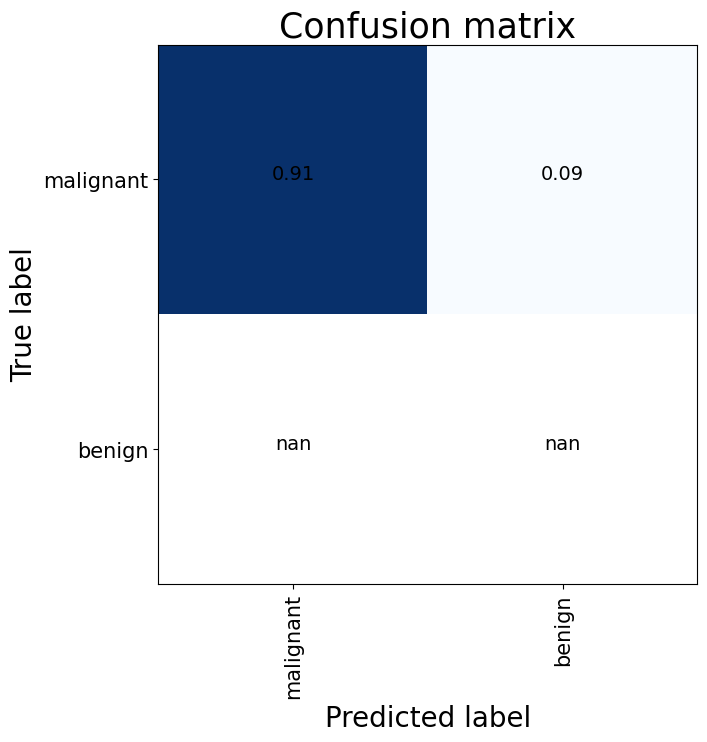

In [ ]:
# plot confusion matrix
plot_confusion_matrix(val_labels, predicted_labels)

In [ ]:
# Import the VGG16 pretrained model
import tensorflow as tf
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten

# initialize the model vgg16 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

# Freeze all but the last 3 layers for layer in vgg16.layers[:-3]: layer.trainable = False


# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=True)

# Extract the output tensor from the last layer of the VGG16 model
vgg16_output = base_model.layers[-2].output  # Accessing the second-to-last layer

# Add additional layers
x = Dropout(0.25)(vgg16_output)
x = Flatten()(x)
output = Dense(8, activation='softmax')(x)

# Create the new model
vgg16_model = Model(inputs=base_model.input, outputs=output, name='VGG16_Model')

553467096/553467096 [==============================] - 6s 0us/step


In [ ]:
import tensorflow as tf
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

def create_vgg16_model(input_shape=(224, 224, 3), num_classes=2):
    # Load the VGG16 pretrained model
    base_model = VGG16(weights='imagenet', include_top=True)

    # Extract the output tensor from the second-to-last layer of the VGG16 model
    vgg16_output = base_model.layers[-2].output

    # Add additional layers with unique names
    x = Dropout(0.25)(vgg16_output)
    x = Flatten(name='custom_flatten')(x)
    output = Dense(num_classes, activation='softmax', name='custom_dense')(x)

    # Create the new model
    vgg16_model = Model(inputs=base_model.input, outputs=output, name='VGG16_Model')

    # Freeze layers
    for layer in vgg16_model.layers[:-3]:
        layer.trainable = False

    return vgg16_model

def train_vgg16_model(model, train_gen, val_gen, train_steps, val_steps, epochs):
    # Compile the model
    model.compile(optimizer=SGD(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

    # Define callbacks
    reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpoint = ModelCheckpoint('VggModel.weights.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    callbacks = [reduceLR, early_stopping, checkpoint]

    # Train the model
    model.fit(train_gen, steps_per_epoch=train_steps,
              validation_data=val_gen, validation_steps=val_steps,
              epochs=epochs, callbacks=callbacks)
TRAIN_STEPS = 20
VAL_STEPS = 18
epochs = 10
# Example usage:
vgg16_model = create_vgg16_model()
# Assuming you have defined train_gen and val_gen for your data generators, and TRAIN_STEPS, VAL_STEPS, and epochs
train_vgg16_model(vgg16_model, train_gen, val_gen, TRAIN_STEPS, VAL_STEPS, epochs)


Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.6876 - accuracy: 0.6181 


Epoch 1: val_loss improved from inf to 0.66258, saving model to VggModel.weights.hdf5
20/20 [==============================] - 743s 38s/step - loss: 0.6876 - accuracy: 0.6181 - val_loss: 0.6626 - val_accuracy: 0.6221 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6702 - accuracy: 0.6234 

20/20 [==============================] - 440s 22s/step - loss: 0.6702 - accuracy: 0.6234 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.6488 - accuracy: 0.6484 

20/20 [==============================] - 446s 22s/step - loss: 0.6488 - accuracy: 0.6484 - lr: 0.0010
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.6259 - accuracy: 0.6828 

20/20 [==============================] - 442s 22s/step - loss: 0.6259 - accuracy: 0.6828 - lr: 0.0010
Epoch 5/10
20/20 [==============================] - ETA: 0s - loss: 0.6239 - accuracy: 0.6767 

20/20 [==============================] - 435s 22s/step - loss: 0.6239 - accuracy: 0.6767 - lr: 0.0010
Epoch 6/10
20/20 [==============================] - ETA: 0s - loss: 0.6141 - accuracy: 0.6751 

20/20 [==============================] - 435s 22s/step - loss: 0.6141 - accuracy: 0.6751 - lr: 0.0010
Epoch 7/10
20/20 [==============================] - ETA: 0s - loss: 0.6407 - accuracy: 0.6469 

20/20 [==============================] - 444s 22s/step - loss: 0.6407 - accuracy: 0.6469 - lr: 0.0010
Epoch 8/10
20/20 [==============================] - ETA: 0s - loss: 0.6188 - accuracy: 0.6891 

20/20 [==============================] - 446s 22s/step - loss: 0.6188 - accuracy: 0.6891 - lr: 0.0010
Epoch 9/10
20/20 [==============================] - ETA: 0s - loss: 0.5884 - accuracy: 0.7219 

20/20 [==============================] - 446s 22s/step - loss: 0.5884 - accuracy: 0.7219 - lr: 0.0010
Epoch 10/10
20/20 [==============================] - ETA: 0s - loss: 0.5733 - accuracy: 0.7116 

20/20 [==============================] - 440s 22s/step - loss: 0.5733 - accuracy: 0.7116 - lr: 0.0010


In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.applications import VGG16
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Assuming you have two classes for binary classification
num_classes = 2

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=True)

# Extract the output tensor from the last layer of the VGG16 model
vgg16_output = base_model.layers[-2].output  # Accessing the second-to-last layer

# Add additional layers
x = Dropout(0.25)(vgg16_output)
x = Flatten()(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the new model
vgg16_model = Model(inputs=base_model.input, outputs=output, name='VGG16_Model')

# Freeze layers if needed
for layer in vgg16_model.layers[:-3]:
    layer.trainable = False

# Compile the model
vgg16_model.compile(optimizer=SGD(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary for verification
vgg16_model.summary()

# Callbacks
reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('VggModel.weights.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks = [reduceLR, early_stopping, checkpoint]
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   vertical_flip = True,
                                   validation_split=0.25)
# Assuming you have a generator for training and validation
# train_gen and val_gen should be instances of ImageDataGenerator.flow_from_directory or a similar generator
# Make sure to set the correct batch size, target size, and class mode
# Example: train_gen = train_datagen.flow_from_directory(...)
base_path = '/content/drive/MyDrive/rop'
target_size = (224,224,3)
train_gen = datagen.flow_from_directory(base_path,
                                               target_size=target_size[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset='training')
val_gen =  datagen.flow_from_directory(base_path,
                                               target_size=target_size[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset='validation',
                                               shuffle=False)
# Train the model
epochs = 15
TRAIN_STEPS = 50  # Update with the correct number of training steps
VAL_STEPS = 40 # Update with the correct number of validation steps

vgg16_model.fit(
    train_gen,
    steps_per_epoch=TRAIN_STEPS,
    validation_data=val_gen,
    validation_steps=VAL_STEPS,
    epochs=epochs,
    callbacks=callbacks
)


Model: "VGG16_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       


Epoch 1: val_loss improved from inf to 0.67482, saving model to VggModel.weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 1246s 25s/step - loss: 0.6879 - accuracy: 0.6009 - val_loss: 0.6748 - val_accuracy: 0.6221 - lr: 0.0010


In [ ]:
import numpy as np
from sklearn.metrics import classification_report
# Evaluate the model
vgg16_model.evaluate(val_gen)



14/14 [==============================] - 304s 22s/step - loss: 0.6463 - accuracy: 0.6244


[0.6463154554367065, 0.6244239807128906]

In [ ]:
# get the model predictions
predicted_labels = np.argmax(vgg16_model.predict(val_gen), axis=1)


14/14 [==============================] - 339s 23s/step


              precision    recall  f1-score   support

   malignant       0.62      0.99      0.77       270
      benign       0.60      0.02      0.04       164

    accuracy                           0.62       434
   macro avg       0.61      0.51      0.40       434
weighted avg       0.62      0.62      0.49       434

[[268   2]
 [161   3]]


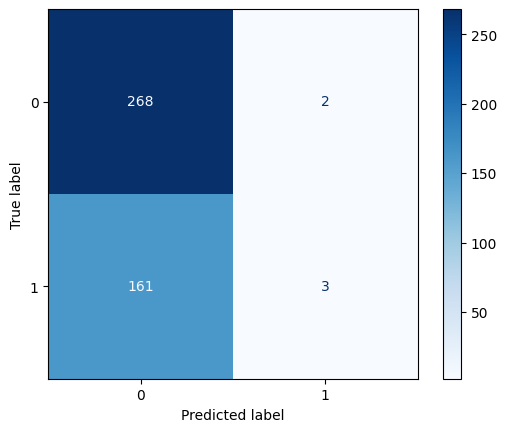

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

target_names=classes
val_labels = val_gen.classes
# show classification report
print(classification_report(val_labels, predicted_labels, target_names=classes))

cm = confusion_matrix(val_labels, predicted_labels)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# plot confusion matrix
#plot_confusion_matrix(val_labels, predicted_labels)
#plt.show()


In [ ]:
import tensorflow as tf
from keras.applications import MobileNet
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# initializing the mobilenet model
mobilenet = MobileNet(input_shape=(224,224,3), weights='imagenet', include_top=False)

# freezing all but the last 5 layers
for layer in mobilenet.layers[:-5]:
  layer.trainable = False

# add few mor layers
x = mobilenet.layers[-1].output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
output = Dense(8, activation='softmax')(x)

# Create the model
mobilenet_model = Model(mobilenet.input, output, name= "Mobilenet_Model")

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
TRAIN_STEPS = 20
VAL_STEPS = 18
epochs = 10
def create_mobilenet_model(input_shape=(224, 224, 3), num_classes=2):
    base_model = MobileNetV2(input_shape=input_shape, weights='imagenet', include_top=False)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.25)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output, name='MobileNetV2_Model')

    return model

def compile_and_train_mobilenet(model, train_gen, val_gen, train_steps, val_steps, epochs):
    model.compile(optimizer=SGD(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

    checkpoint = ModelCheckpoint('MobilenetModel.weights.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    callbacks = [reduceLR, early_stopping, checkpoint]

    model.fit(train_gen, steps_per_epoch=train_steps,
              validation_data=val_gen, validation_steps=val_steps,
              epochs=epochs, callbacks=callbacks)


# Assuming you have train_gen, val_gen, TRAIN_STEPS, VAL_STEPS, and epochs defined
num_classes = 2  # Adjust this according to the number of classes in your dataset
mobilenet_model = create_mobilenet_model(num_classes=num_classes)
compile_and_train_mobilenet(mobilenet_model, train_gen, val_gen, TRAIN_STEPS, VAL_STEPS, epochs)


Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.7277 - accuracy: 0.5562


Epoch 1: val_loss improved from inf to 0.72023, saving model to MobilenetModel.weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 199s 9s/step - loss: 0.7277 - accuracy: 0.5562 - val_loss: 0.7202 - val_accuracy: 0.5461 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6220 - accuracy: 0.7094

20/20 [==============================] - 136s 7s/step - loss: 0.6220 - accuracy: 0.7094 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.5204 - accuracy: 0.8078

20/20 [==============================] - 135s 7s/step - loss: 0.5204 - accuracy: 0.8078 - lr: 0.0010
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.4731 - accuracy: 0.8479

20/20 [==============================] - 152s 8s/step - loss: 0.4731 - accuracy: 0.8479 - lr: 0.0010
Epoch 5/10
20/20 [==============================] - ETA: 0s - loss: 0.4376 - accuracy: 0.8625

20/20 [==============================] - 135s 7s/step - loss: 0.4376 - accuracy: 0.8625 - lr: 0.0010
Epoch 6/10
20/20 [==============================] - ETA: 0s - loss: 0.4048 - accuracy: 0.8732

20/20 [==============================] - 134s 7s/step - loss: 0.4048 - accuracy: 0.8732 - lr: 0.0010
Epoch 7/10
20/20 [==============================] - ETA: 0s - loss: 0.3717 - accuracy: 0.8922

20/20 [==============================] - 130s 6s/step - loss: 0.3717 - accuracy: 0.8922 - lr: 0.0010
Epoch 8/10
20/20 [==============================] - ETA: 0s - loss: 0.3632 - accuracy: 0.8828

20/20 [==============================] - 132s 7s/step - loss: 0.3632 - accuracy: 0.8828 - lr: 0.0010
Epoch 9/10
20/20 [==============================] - ETA: 0s - loss: 0.3357 - accuracy: 0.8843

20/20 [==============================] - 133s 7s/step - loss: 0.3357 - accuracy: 0.8843 - lr: 0.0010
Epoch 10/10
20/20 [==============================] - ETA: 0s - loss: 0.3164 - accuracy: 0.9049

20/20 [==============================] - 126s 6s/step - loss: 0.3164 - accuracy: 0.9049 - lr: 0.0010


In [ ]:
# Evaluate the model
mobilenet_model.evaluate(val_gen)

# get the model's predictions
predicted_labels = np.argmax(mobilenet_model.predict(val_gen), axis=1)

# show the classification report
print(classification_report(val_labels, predicted_labels, target_names=classes))

# plot the confusion matrix
#plot_confusion_matrix(val_labels, predicted_labels)



14/14 [==============================] - 31s 2s/step
              precision    recall  f1-score   support

   malignant       0.73      0.76      0.74       270
      benign       0.58      0.54      0.56       164

    accuracy                           0.68       434
   macro avg       0.65      0.65      0.65       434
weighted avg       0.67      0.68      0.67       434



              precision    recall  f1-score   support

   malignant       0.73      0.76      0.74       270
      benign       0.58      0.54      0.56       164

    accuracy                           0.68       434
   macro avg       0.65      0.65      0.65       434
weighted avg       0.67      0.68      0.67       434

[[205  65]
 [ 76  88]]


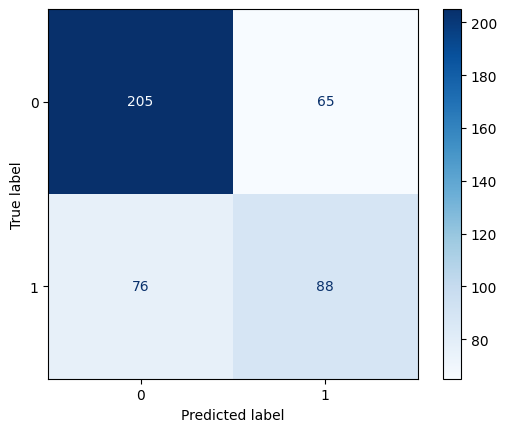

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

target_names=classes
val_labels = val_gen.classes
# show classification report
print(classification_report(val_labels, predicted_labels, target_names=classes))

cm = confusion_matrix(val_labels, predicted_labels)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

TRAIN_STEPS = 10
VAL_STEPS = 10
epochs = 10

def create_resnet50_model(input_shape=(224, 224, 3), num_classes=2):
    # Load the ResNet50 pretrained model
    base_model = ResNet50(weights='imagenet', include_top=True)

    # Extract the output tensor from the second-to-last layer of the ResNet50 model
    resnet50_output = base_model.layers[-2].output

    # Add additional layers
    x = Dropout(0.25)(resnet50_output)
    x = Flatten()(x)
    output = Dense(num_classes, activation='softmax')(x)

    # Create the new model
    resnet50_model = Model(inputs=base_model.input, outputs=output, name='ResNet50_Model')

    # Freeze layers
    for layer in resnet50_model.layers[:-3]:
        layer.trainable = False

    return resnet50_model

def train_resnet50_model(model, train_gen, val_gen, train_steps, val_steps, epochs):
    # Compile the model
    model.compile(optimizer=SGD(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

    # Define callbacks
    reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpoint = ModelCheckpoint('ResNet50Model.weights.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    callbacks = [reduceLR, early_stopping, checkpoint]

    # Train the model
    model.fit(train_gen, steps_per_epoch=train_steps,
              validation_data=val_gen, validation_steps=val_steps,
              epochs=epochs, callbacks=callbacks)

# Example usage:
resnet50_model = create_resnet50_model()
# Assuming you have defined train_gen and val_gen for your data generators, and TRAIN_STEPS, VAL_STEPS, and epochs
train_resnet50_model(resnet50_model, train_gen, val_gen, TRAIN_STEPS, VAL_STEPS, epochs)

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.7926 - accuracy: 0.4906 
Epoch 1: val_loss improved from inf to 0.65265, saving model to ResNet50Model.weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 267s 27s/step - loss: 0.7926 - accuracy: 0.4906 - val_loss: 0.6526 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.6971 - accuracy: 0.5627
Epoch 2: val_loss improved from 0.65265 to 0.58115, saving model to ResNet50Model.weights.hdf5
10/10 [==============================] - 183s 19s/step - loss: 0.6971 - accuracy: 0.5627 - val_loss: 0.5811 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.6792 - accuracy: 0.6156
Epoch 3: val_loss improved from 0.58115 to 0.55775, saving model to ResNet50Model.weights.hdf5
10/10 [==============================] - 241s 25s/step - loss: 0.6792 - accuracy: 0.6156 - val_loss: 0.5578 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.6870 - accuracy: 0.6187
Epoch 4: val_loss did not improve from 0.55775
10/10 [==============================] - 160s 17s

In [ ]:
# Evaluate the model
resnet50_model.evaluate(val_gen)

# get the model's predictions
predicted_labels = np.argmax(resnet50_model.predict(val_gen), axis=1)



# plot the confusion matrix
#plot_confusion_matrix(val_labels, predicted_labels)

14/14 [==============================] - 103s 7s/step


NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   malignant       0.62      1.00      0.77       270
      benign       0.00      0.00      0.00       164

    accuracy                           0.62       434
   macro avg       0.31      0.50      0.38       434
weighted avg       0.39      0.62      0.48       434

[[270   0]
 [164   0]]


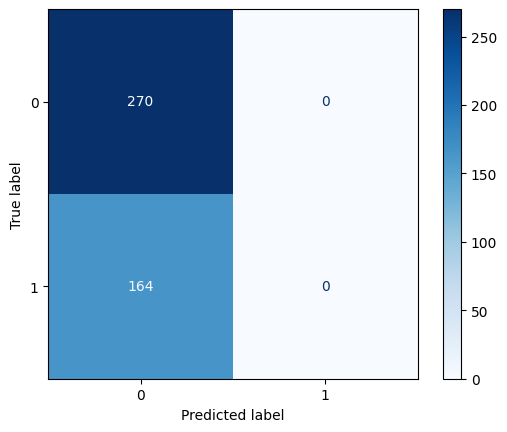

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

target_names=classes
val_labels = val_gen.classes
# show classification report
print(classification_report(val_labels, predicted_labels, target_names=classes))

cm = confusion_matrix(val_labels, predicted_labels)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# concatenate the models

# import concatenate layer
from keras.layers import Concatenate

# get list of models
models = [custom_model, vgg16_model, mobilenet_model, resnet50_model]

input = Input(shape=(224, 224, 3), name='input') # input layer

# get output for each model input
outputs = [model(input) for model in models]

# contenate the ouputs
x = Concatenate()(outputs)

# add further layers
x = Dropout(0.5)(x)
output = Dense(8, activation='softmax', name='output')(x) # output layer

# create concatenated model
conc_model = Model(input, output, name= 'Concatenated_Model')

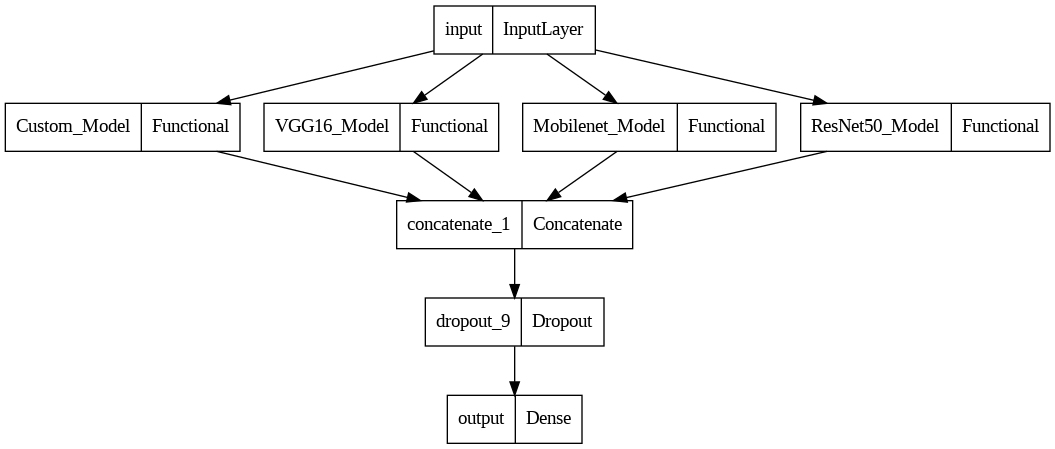

In [ ]:
# show model structure
from keras.utils import plot_model
plot_model(conc_model)

In [ ]:
# average ensemble model

# import Average layer
from keras.layers import Average
from keras.layers import Input, Dense, Dropout, Average, Concatenate
from keras.models import Model

input = Input(shape=(224, 224, 3), name='input')  # input layer

# get output for each input model
#outputs = [model(input) for model in models]

# take average of the outputs
#x = Average()(outputs)

#x = Dense(16, activation='relu')(x)
#x = Dropout(0.3)(x)
#output = Dense(8, activation='softmax', name='output')(x) # output layer

# create average ensembled model
#avg_model = Model(input, output)


# List to store modified model outputs
modified_outputs = []

# Iterate through models and modify their outputs
for model in models:
    # Add a Dense layer to each model's output
    modified_output = Dense(8, activation='relu')(model(input))
    modified_outputs.append(modified_output)

# Concatenate the modified outputs
concatenated_output = Concatenate()(modified_outputs)

# Average the concatenated output
average_output = Average()(modified_outputs)

# Further layers
x = Dense(16, activation='relu')(average_output)
x = Dropout(0.3)(x)
output = Dense(8, activation='softmax', name='output')(x)

# Create the model
avg_model = Model(inputs=input, outputs=output, name='Average_Ensemble_Model')


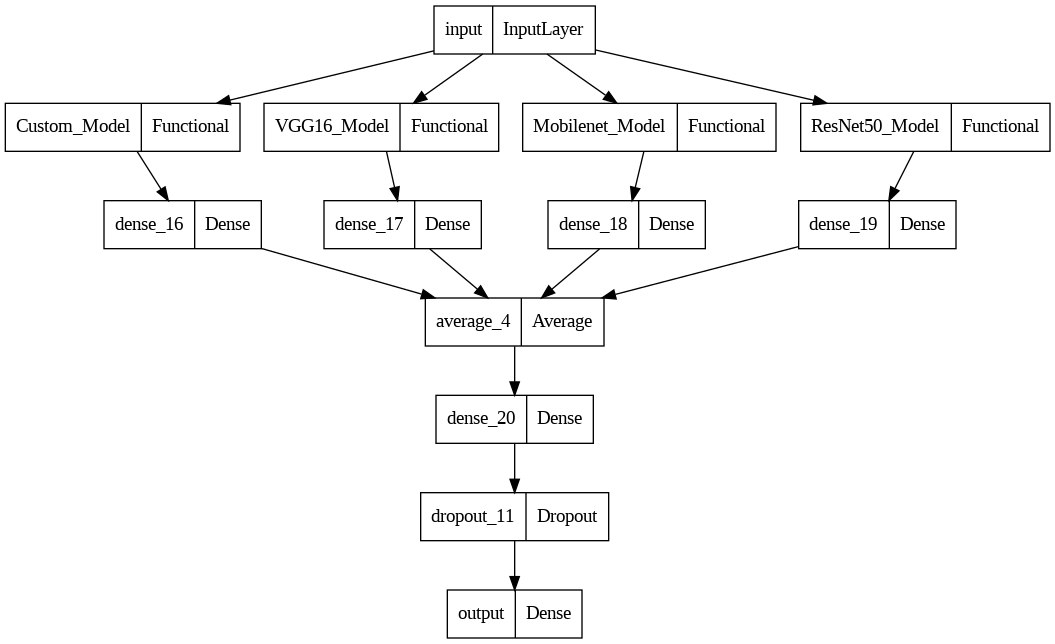

In [ ]:
# show model structure7

In [ ]:
# function for setting weights

import numpy as np
from keras.layers import Layer, Concatenate, Input, Dense
from keras.models import Model


def weight_init(shape =(1,1,3), weights=[1,2,3], dtype=tf.float32):
    return tf.constant(np.array(weights).reshape(shape), dtype=dtype)

# implement custom weighted average layer

import tensorflow as tf
from keras.layers import Layer, Concatenate

class WeightedAverage(Layer):

    def __init__(self):
        super(WeightedAverage, self).__init__()

    def build(self, input_shape):

        self.W = self.add_weight(
                    shape=(1,1,len(input_shape)),
                    initializer=weight_init,
                    dtype=tf.float32,
                    trainable=True)
    def call(self, inputs):

        inputs = [tf.expand_dims(i, -1) for i in inputs]
        inputs = Concatenate(axis=-1)(inputs)
        weights = tf.nn.softmax(self.W, axis=-1)

        return tf.reduce_mean(weights*inputs, axis=-1)


In [ ]:
import numpy as np
from keras.layers import Layer, Concatenate, Input, Dense
from keras.models import Model

def weight_init(shape=(1, 1, 3), weights=[1, 2, 3], dtype=tf.float32):
    if np.prod(shape) == len(weights):
        return tf.constant(np.array(weights).reshape(shape), dtype=dtype)
    elif np.prod(shape) > len(weights):
        return tf.constant(np.array(weights + [0] * (np.prod(shape) - len(weights))).reshape(shape), dtype=dtype)
    else:
        raise ValueError("Invalid combination of shape and weights length")

import tensorflow as tf
from keras.layers import Layer, Concatenate

class WeightedAverage(Layer):

    def __init__(self):
        super(WeightedAverage, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(
            shape=(1, 1, len(input_shape)),
            initializer=weight_init,
            dtype=tf.float32,
            trainable=True)

    def call(self, inputs):
        inputs = [tf.expand_dims(i, -1) for i in inputs]
        inputs = [tf.reshape(i, (-1, i.shape[1])) for i in inputs]  # Reshape each tensor to (None, features)
        inputs = Concatenate(axis=-1)(inputs)
        weights = tf.nn.softmax(tf.transpose(self.W, perm=[0, 2, 1]), axis=-1)  # Transpose before softmax

        return tf.reduce_mean(weights * inputs, axis=-1)

# Assuming you have a list of models: models
input_layer = Input(shape=(224, 224, 3), name='input')  # input layer

# get output for each input model
outputs = [model(input_layer) for model in models]

# get weighted average of outputs
x = WeightedAverage()(outputs)

output = Dense(8, activation='softmax')(x)  # output layer

weighted_avg_model = Model(input_layer, output, name='Weighted_Average_Model')


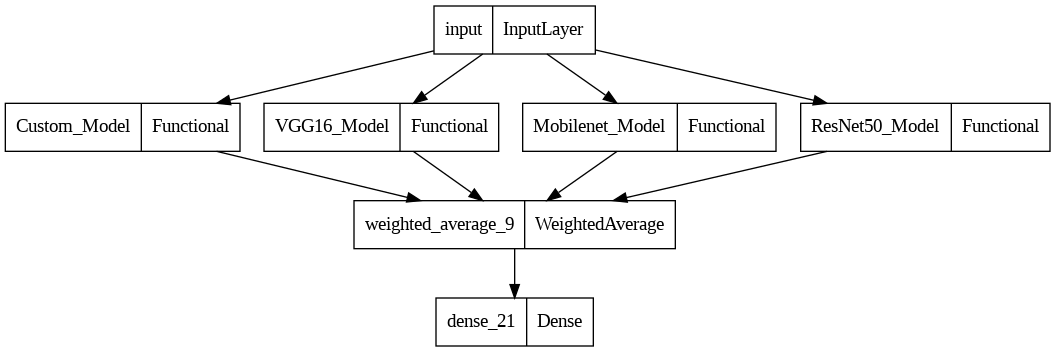

In [ ]:
# plot model
plot_model(weighted_avg_model)